In [62]:

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


In [18]:

file_path = '/Users/bhupendra/projects/earnest/data/out/IOWA_windy-weather-episodes_1996-2023_v24-04.csv'  # Adjust this to your file path
data = pd.read_csv(file_path)

In [20]:
data

,time,tzone,lat,lon,state,episode,events,derecho,tornado,funnel_cloud,...,sleet,storm_surge_tide,tropical_depression,tropical_storm,tsunami,volcanic_ash,waterspout,wildfire,winter_storm,winter_weather
0,1996-01-26 12:54:00,CST,41.700000,-93.58,IOWA,2403185,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1996-01-26 15:00:00,CST,41.700000,-93.58,IOWA,2403186,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1996-03-24 15:42:00,CST,40.730000,-94.80,IOWA,1000982,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1996-03-24 16:33:00,CST,41.050000,-94.40,IOWA,2403192,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1996-04-18 16:00:00,CST,41.480000,-91.40,IOWA,2034258,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-08-11 18:53:00,CST-6,42.980000,-95.69,IOWA,185276,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2645,2023-09-23 11:54:40,CST-6,41.746667,-94.54,IOWA,185765,3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2646,2023-10-03 19:27:00,CST-6,42.435000,-96.36,IOWA,186700,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2647,2023-10-12 15:00:00,CST-6,NaN,NaN,IOWA,186705,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False


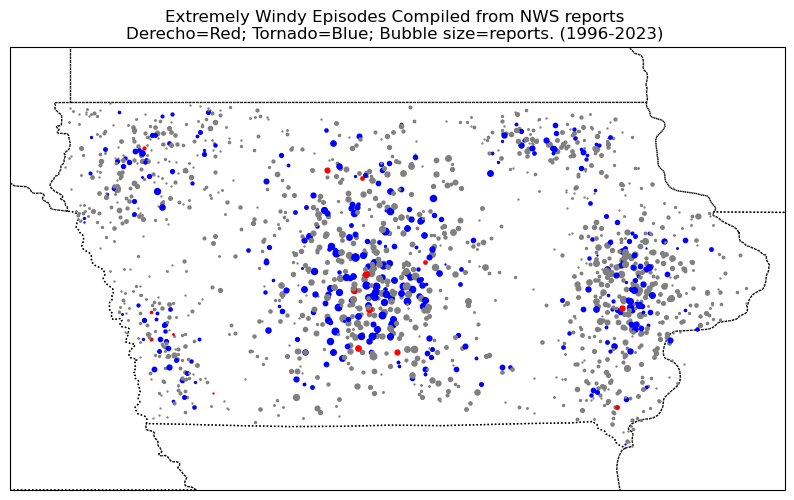

In [49]:


def plot_events(df):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-90, -97, 40, 44], crs=ccrs.PlateCarree())

    # Map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')

    # Plot events
    for _, row in df.iterrows():
        color = 'grey'  
        if row['tornado']:
            color = 'blue'
        elif row['derecho']:
            color = 'red'

        bubblesize = np.log(row['events'])
        ax.plot(row['lon'], row['lat'], 'o', markersize=bubblesize, color=color, transform=ccrs.PlateCarree())

    plt.title('Extremely Windy Episodes Compiled from NWS reports \nDerecho=Red; Tornado=Blue; Bubble size=reports. (1996-2023)')
    plt.show()

plot_events(data)


/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_51075/2331717263.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  series_ycount = data.groupby(pd.Grouper(key='time', freq='Y')).size()


<Axes: xlabel='time'>

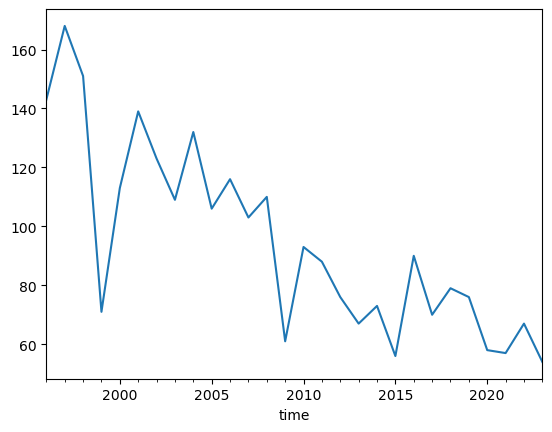

In [61]:
data['time'] = pd.to_datetime(data['time'])

# Group by months and count events in each month
series_ycount = data.groupby(pd.Grouper(key='time', freq='Y')).size()
series_ycount['events']